In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import  stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [3]:
train = pd.read_csv('train.csv')

selected_features = ['loc-id', 'time-stamp']
x_train = train[selected_features]
x_train.head()

,loc-id,time-stamp
0,34,101114
1,34,92220
2,6,101810
3,8,91310
4,12,82122


In [4]:
x_train = x_train[x_train['loc-id'] == 1]['time-stamp'].astype(str)
x_train.head()

37     103008
41     103009
55     101814
59      90915
283     91419
Name: time-stamp, dtype: object

In [70]:
loc_time_num = pd.read_csv('loc_time_num.csv')
for loc in range(1, 37):
    for month in range(7, 11):
#         print('month:', month)
        if month == 9:
            days = 30
        else: 
            days = 31
        for day in range(1, days + 1):
#             print('day:', day)
            for hour in range(0, 24):
                day_to_str = str(day)
                if day < 10:
                    day_to_str = '0' + day_to_str
                hour_to_str = str(hour)
                if hour < 10:
                    hour_to_str = '0' + hour_to_str
                time = int(str(month) + day_to_str + hour_to_str)
                if loc_time_num[loc_time_num['loc-id'] == loc][loc_time_num['time-stamp'] == time].empty:
                    loc_time_num = loc_time_num.append(pd.Series({'loc-id': loc, 'time-stamp': time, 'numOfPeople': np.NaN}), ignore_index = True)

E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [74]:
loc_time_num['loc-id'] = loc_time_num['loc-id'].astype(int)
loc_time_num['time-stamp'] = loc_time_num['time-stamp'].astype(int)
loc_time_num = loc_time_num.sort_values(by = selected_features)
loc_time_num.to_csv('loc_time_num_fillna.csv', columns = ['loc-id', 'time-stamp', 'numOfPeople'], index = False)

In [5]:
x=[]
for time in x_train:
    if time[:2] == '10':
        x.append(time)
x

['103008',
 '103009',
 '101814',
 '100220',
 '101718',
 '101909',
 '101118',
 '100912',
 '101118',
 '101519',
 '101815',
 '101917',
 '101921',
 '101922',
 '102315',
 '102816',
 '101009',
 '100913',
 '101017',
 '100812',
 '100918',
 '101015',
 '101113',
 '101509',
 '101615',
 '101617',
 '101812',
 '101912',
 '101918',
 '101921',
 '102015',
 '102017',
 '102112',
 '102116',
 '102221',
 '102309',
 '102317',
 '102612',
 '102812',
 '103119',
 '102009',
 '102022',
 '102917',
 '102611',
 '102815',
 '102921',
 '102722',
 '100115',
 '101817',
 '102009',
 '102011',
 '101810',
 '101507',
 '101511',
 '102411',
 '102412',
 '102509',
 '100318',
 '100508',
 '101922',
 '102215',
 '102512',
 '103015',
 '101700',
 '101712',
 '100714',
 '101714',
 '100812',
 '102107',
 '102713',
 '102820',
 '102016',
 '102408',
 '102710',
 '102511',
 '101820',
 '102111',
 '101610',
 '101810',
 '101814',
 '103013',
 '102808',
 '101713',
 '102611',
 '101920',
 '102319',
 '102413',
 '101819',
 '101819',
 '101908',
 '102019',

In [6]:
loc1_time_num = {}
for day in range(1, 32):
    for hour in range(0, 24):
        day_str = str(day)
        if day < 10:
            day_str = '0' + day_str
        hour_str = str(hour)
        if hour < 10:
            hour_str = '0' + hour_str
        time = '10' + day_str + hour_str
        num = 0
        for s in x:
            if s == time:
                num += 1
        if num == 0:
            loc1_time_num[time] = np.NaN
            print(time)
        else:
            loc1_time_num[time] = num

100503
100504
100702
100704
101201
101202
101203
101204
101205
101206
101207
101208
101209
101210
101211
101212
101213
101214
101215
101216
101217
101218
101219
101220
101221
101222
101223
101300
101301
101302
101303
101304
101305
101306
101307
101308
101309
101310
101311
101312
101313
101314
101315
101316
101317
101318
101319
101320
101321
101322
101323
101400
101401
101402
101403
101404
101405
101406
101407
101408
101409
101410
101411
101412
101413
101414
101415
101416
101417
101418
101419
101420
101421
101422
101423
101500
101501
101502


In [7]:
loc1_time_num_submission = pd.DataFrame({'time-stamp': list(loc1_time_num.keys()), 'numOfPeople': list(loc1_time_num.values())})
loc1_time_num_submission = loc1_time_num_submission.sort_values(by = 'time-stamp')
loc1_time_num_submission.head()

,numOfPeople,time-stamp
109,7.0,100100
85,3.0,100101
691,1.0,100102
462,2.0,100103
520,3.0,100104


In [8]:
loc1_time_num_submission.to_csv('loc1_time_num.csv', columns = ['time-stamp', 'numOfPeople'], index = False)

In [400]:
dd=[2,1,3,2,4]
pd.Series(dd).diff()

0    NaN
1   -1.0
2    2.0
3   -1.0
4    2.0
dtype: float64

1 {713.0: '2015-07-02 07:00:00', 474.0: '2015-09-11 07:00:00', 518.0: '2015-07-02 09:00:00'}


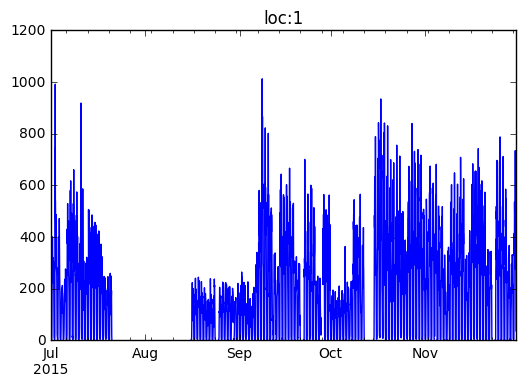

2 {216.0: '2015-11-03 00:00:00', 213.0: '2015-11-11 13:00:00', 207.0: '2015-09-11 12:00:00'}


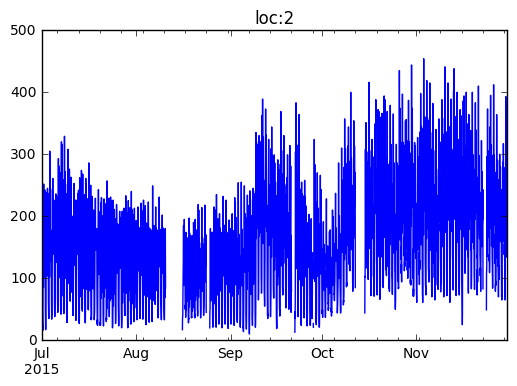

3 {385.0: '2015-10-10 02:00:00', 370.0: '2015-10-28 12:00:00', 373.0: '2015-11-25 17:00:00'}


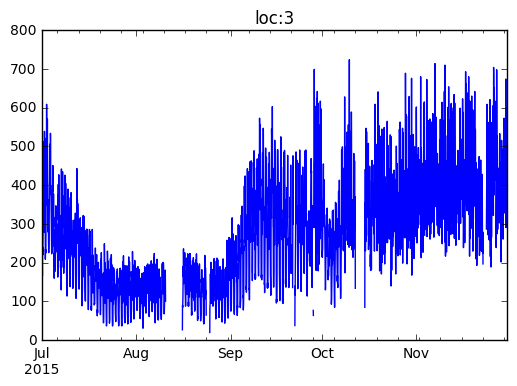

4 {361.0: '2015-10-23 17:00:00', 315.0: '2015-11-04 17:00:00', 348.0: '2015-10-23 01:00:00'}


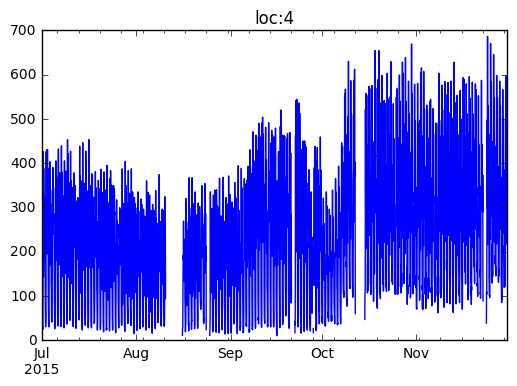

5 {328.0: '2015-11-30 12:00:00', 329.0: '2015-10-20 12:00:00', 313.0: '2015-10-22 17:00:00'}


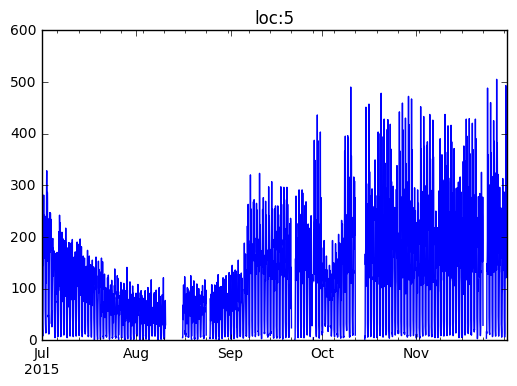

6 {521.0: '2015-11-25 14:00:00', 442.0: '2015-11-16 14:00:00', 463.0: '2015-10-26 14:00:00'}


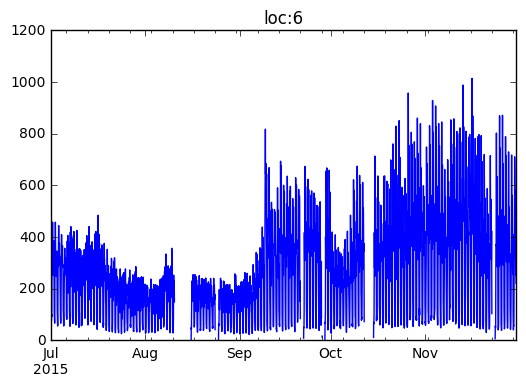

7 {728.0: '2015-10-08 17:00:00', 749.0: '2015-11-12 17:00:00', 742.0: '2015-11-03 17:00:00'}


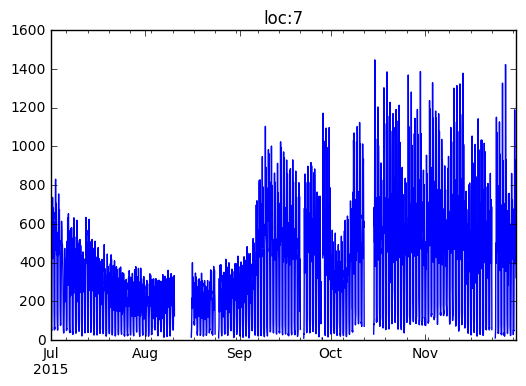

8 {776.0: '2015-11-11 13:00:00', 748.0: '2015-11-11 17:00:00', 812.0: '2015-11-04 17:00:00'}


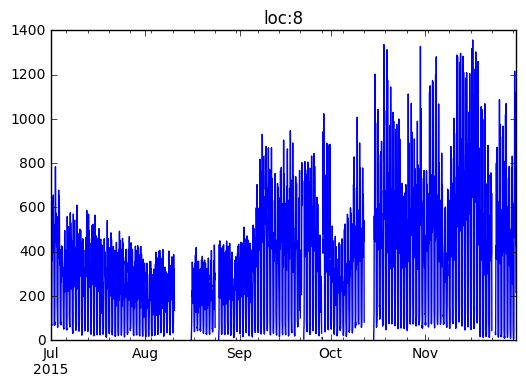

9 {250.0: '2015-09-29 07:00:00', 268.0: '2015-10-26 14:00:00', 254.0: '2015-11-20 07:00:00'}


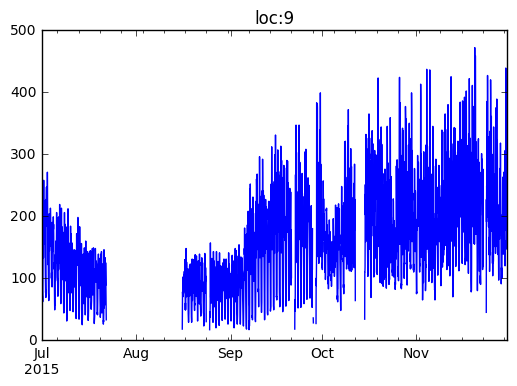

10 {267.0: '2015-11-25 17:00:00', 292.0: '2015-10-28 17:00:00', 270.0: '2015-11-11 13:00:00'}


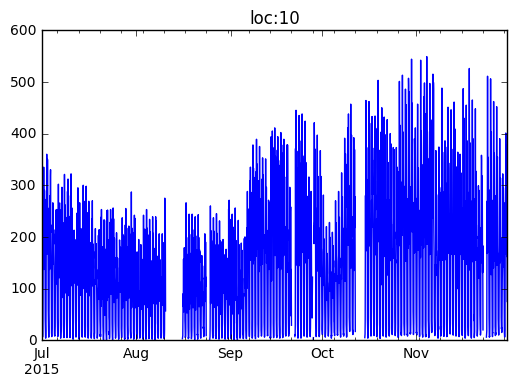

11 {268.0: '2015-09-11 07:00:00', 284.0: '2015-09-11 09:00:00', 343.0: '2015-09-11 12:00:00'}


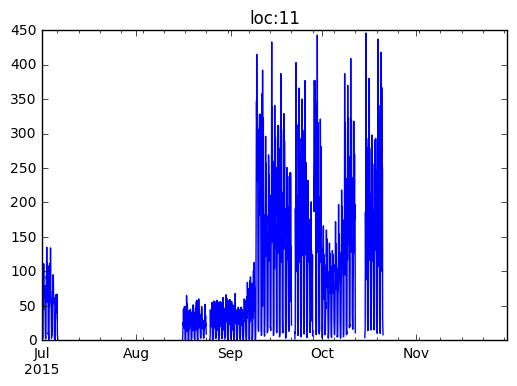

12 {352.0: '2015-11-12 17:00:00', 332.0: '2015-10-19 17:00:00', 333.0: '2015-11-19 17:00:00'}


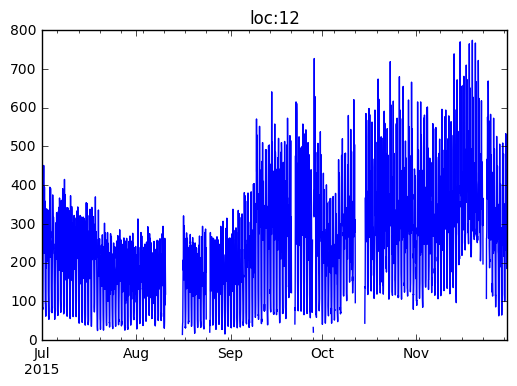

13 {276.0: '2015-10-19 17:00:00', 278.0: '2015-11-02 17:00:00', 286.0: '2015-10-26 17:00:00'}


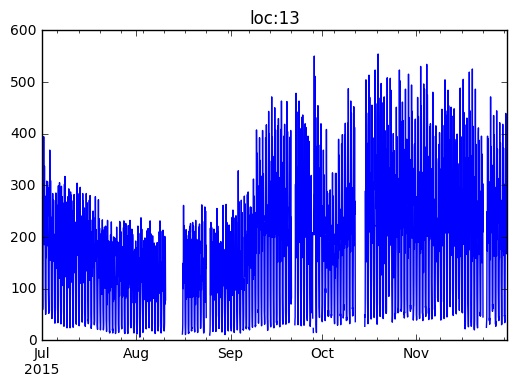

14 {272.0: '2015-11-13 17:00:00', 275.0: '2015-09-22 11:00:00', 271.0: '2015-11-16 17:00:00'}


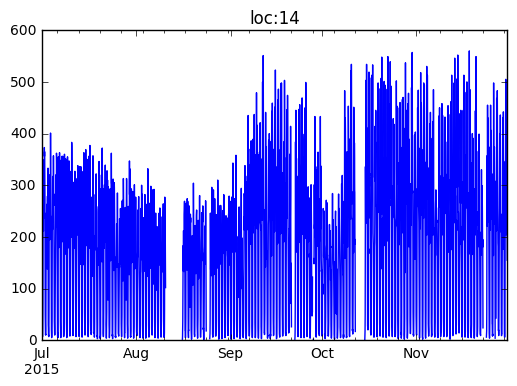

15 {322.0: '2015-11-25 07:00:00', 325.0: '2015-11-18 07:00:00', 326.0: '2015-11-13 14:00:00'}


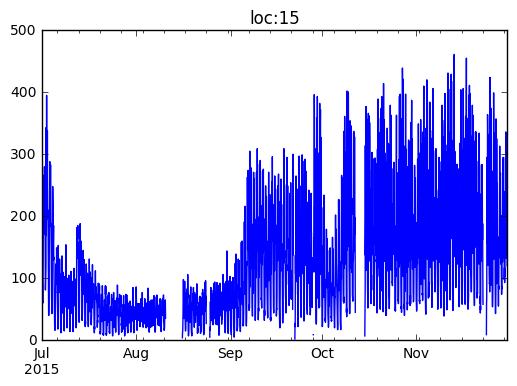

16 {389.0: '2015-09-28 12:00:00', 437.0: '2015-11-04 15:00:00', 415.0: '2015-11-04 14:00:00'}


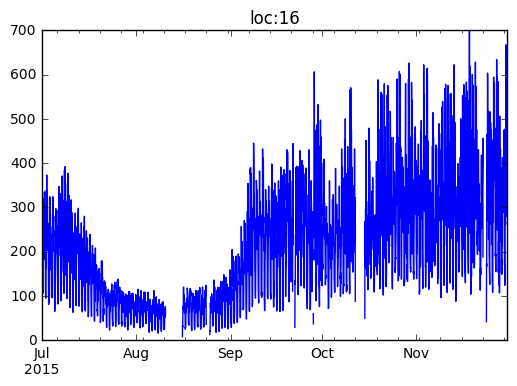

17 {168.0: '2015-11-04 12:00:00', 164.0: '2015-09-30 12:00:00', 149.0: '2015-11-25 12:00:00'}


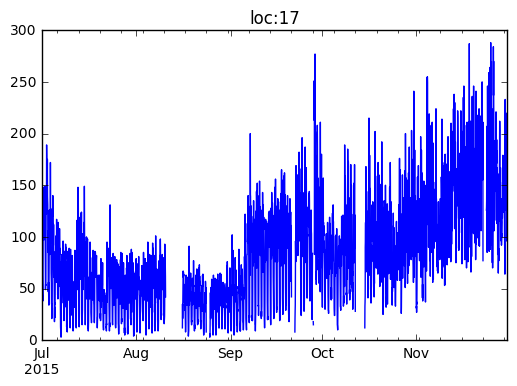

18 {147.0: '2015-10-30 12:00:00', 156.0: '2015-09-22 11:00:00', 126.0: '2015-11-23 00:00:00'}


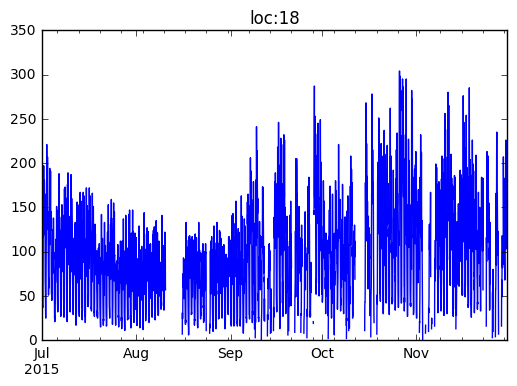

19 {848.0: '2015-11-10 15:00:00', 852.0: '2015-10-22 17:00:00', 879.0: '2015-10-16 17:00:00'}


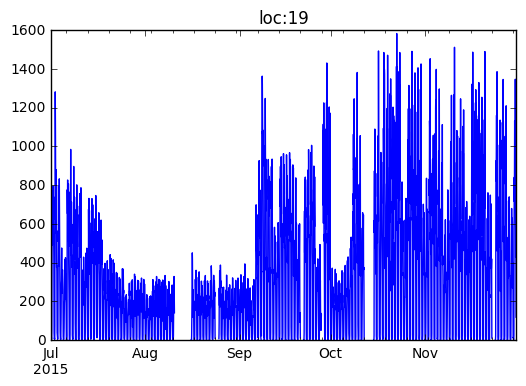

20 {385.0: '2015-11-05 16:00:00', 429.0: '2015-10-16 17:00:00', 390.0: '2015-10-29 16:00:00'}


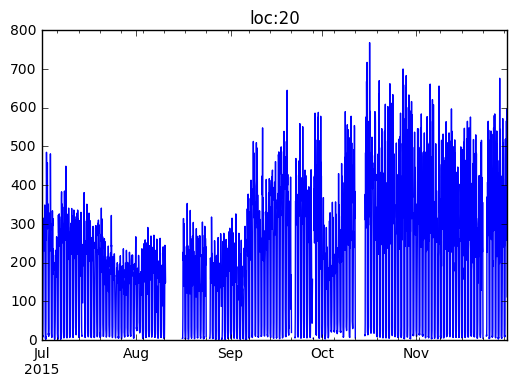

21 {442.0: '2015-11-17 11:00:00', 461.0: '2015-11-03 11:00:00', 454.0: '2015-11-25 17:00:00'}


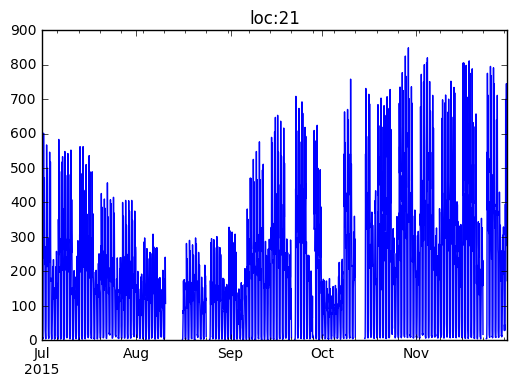

22 {392.0: '2015-09-16 08:00:00', 378.0: '2015-09-22 08:00:00', 372.0: '2015-09-23 08:00:00'}


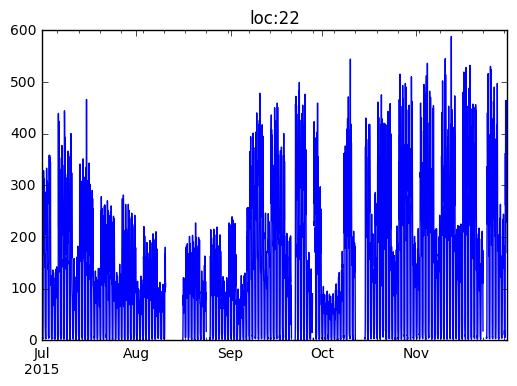

23 {208.0: '2015-11-17 17:00:00', 234.0: '2015-11-30 12:00:00', 220.0: '2015-09-09 08:00:00'}


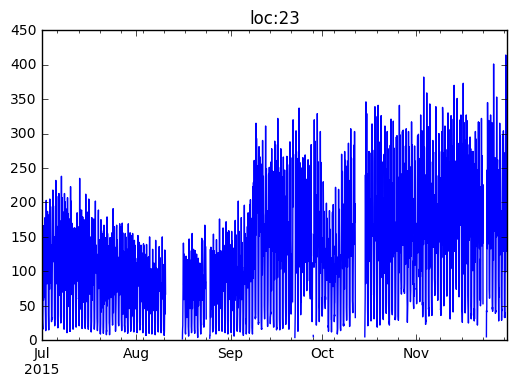

24 {160.0: '2015-10-28 20:00:00', 170.0: '2015-11-27 00:00:00', 174.0: '2015-11-06 13:00:00'}


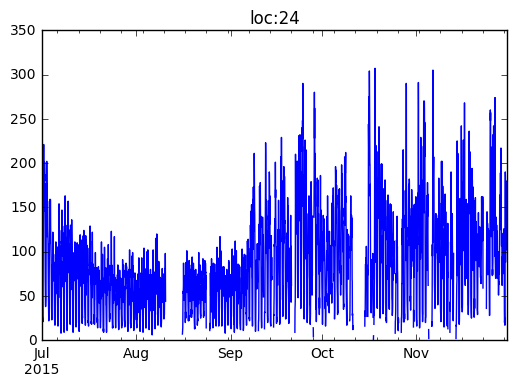

25 {152.0: '2015-11-17 12:00:00', 146.0: '2015-11-12 12:00:00', 155.0: '2015-10-15 12:00:00'}


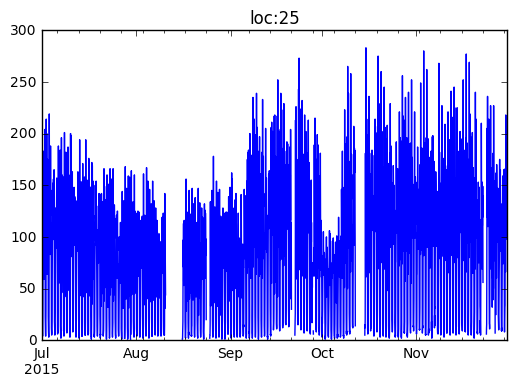

26 {632.0: '2015-10-10 07:00:00', 508.0: '2015-09-30 15:00:00', 559.0: '2015-09-30 07:00:00'}


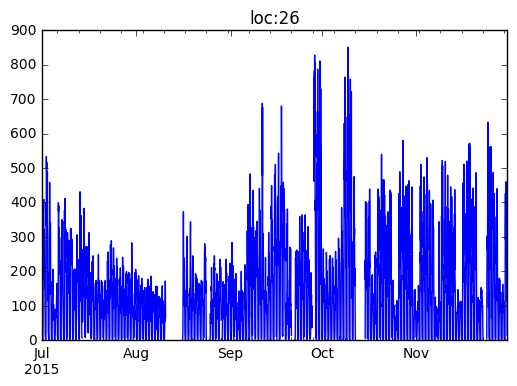

27 {304.0: '2015-11-06 08:00:00', 297.0: '2015-11-20 17:00:00', 348.0: '2015-11-02 08:00:00'}


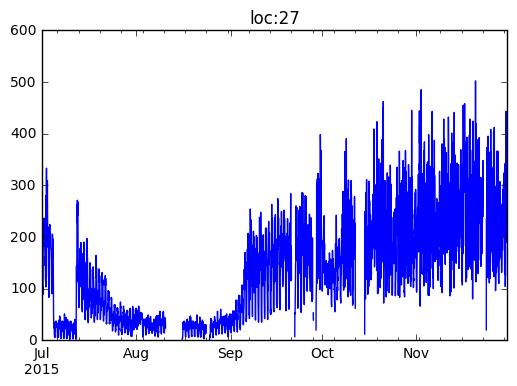

28 {114.0: '2015-10-15 12:00:00', 141.0: '2015-11-11 13:00:00', 133.0: '2015-10-27 17:00:00'}


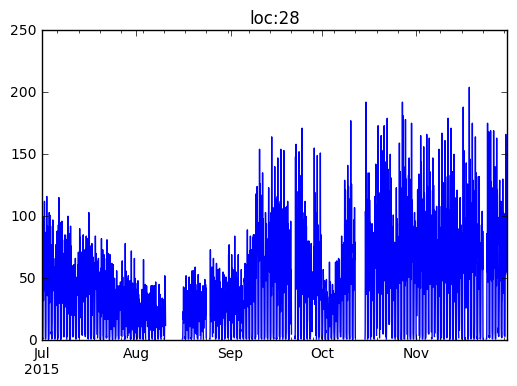

29 {1994.0: '2015-11-24 13:00:00', 2068.0: '2015-11-25 13:00:00', 1950.0: '2015-11-02 13:00:00'}


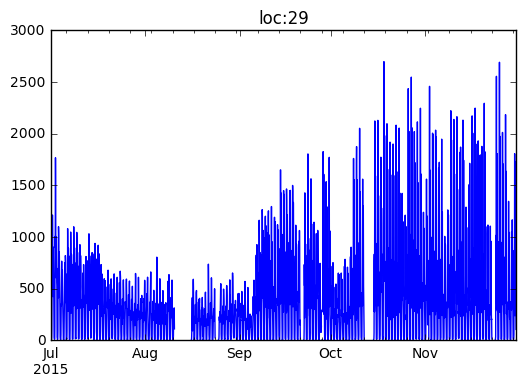

30 {218.0: '2015-07-10 13:00:00', 197.0: '2015-07-02 07:00:00', 186.0: '2015-11-19 19:00:00'}


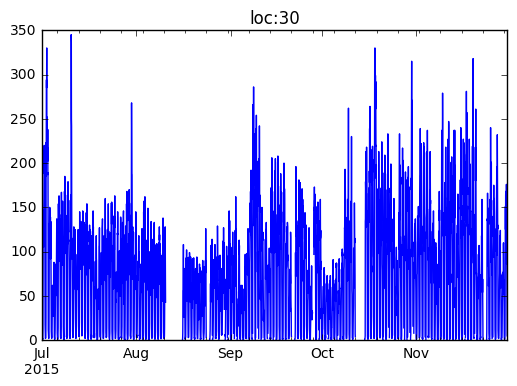

31 {2170.0: '2015-10-26 17:00:00', 2171.0: '2015-10-08 17:00:00', 2077.0: '2015-11-26 17:00:00'}


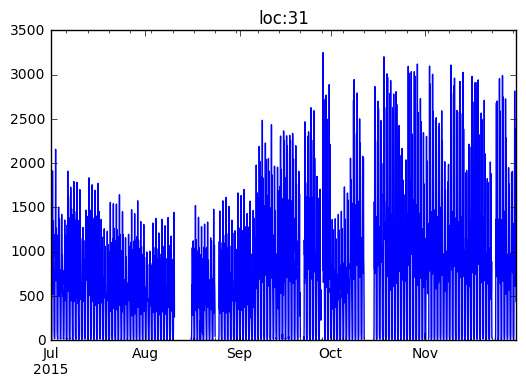

32 {459.0: '2015-11-09 14:00:00', 484.0: '2015-11-16 14:00:00', 487.0: '2015-11-04 07:00:00'}


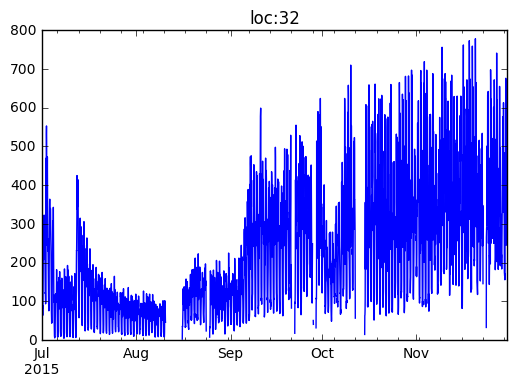

33 {400.0: '2015-09-08 07:00:00', 609.0: '2015-07-02 09:00:00', 390.0: '2015-07-02 07:00:00'}


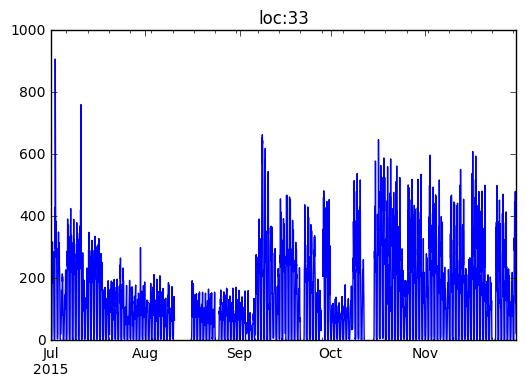

34 {1122.0: '2015-11-25 15:00:00', 1003.0: '2015-11-25 16:00:00', 1014.0: '2015-10-21 15:00:00'}


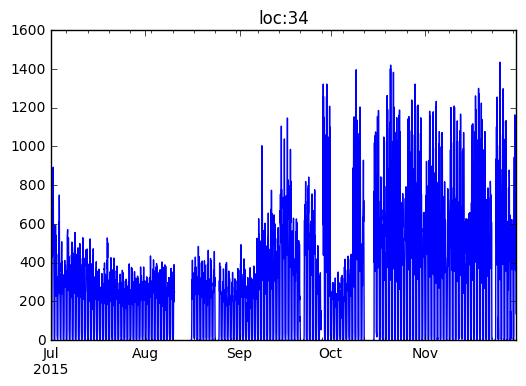

35 {315.0: '2015-11-02 17:00:00', 331.0: '2015-11-03 17:00:00', 325.0: '2015-10-29 21:00:00'}


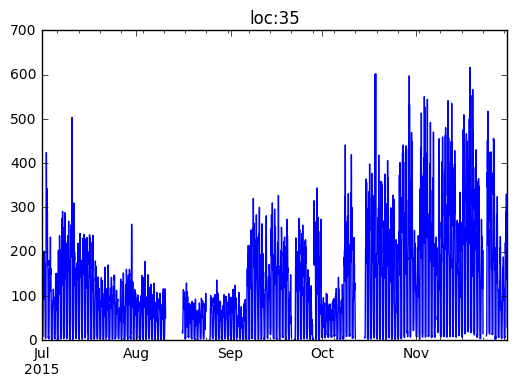

36 {400.0: '2015-07-02 07:00:00', 257.0: '2015-07-08 08:00:00', 224.0: '2015-07-07 08:00:00'}


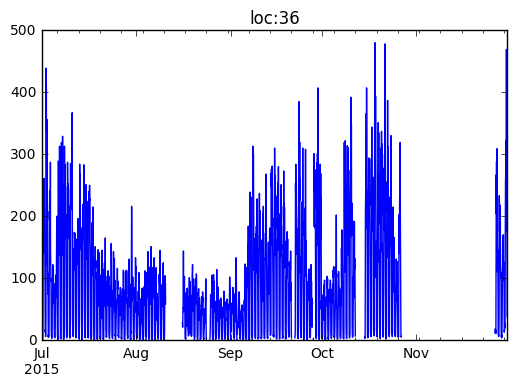

In [484]:
all_train_data = pd.read_csv('./December/all_loc_time_num_fillna_all_diff_three.csv')
t = pd.date_range('7/1/2015', periods=3672, freq='h')
for loc in range(1, 37):
    dt=all_train_data[all_train_data['loc-id'] == loc]['numOfPeople']
    dt.index = pd.Index(t)
#     dt = dt['2015-09-25':'2015-10-15']
    maxVals = findMaxNDiffVal(dt, 3, t)
#     keys = list(maxVals.keys())
#     print(loc, end = ' ')
#     for key in keys:
#         if key > 500:
#             print(str(key) + '  ' + maxVals[key], end = ' ')
#     print()
    print(loc, maxVals)
    fig = plt.figure(figsize=(12,8))
    ax= fig.add_subplot(111)
    dt.plot(figsize=(6,4), title = 'loc:' + str(loc))
    plt.show()

In [446]:
def findMaxNDiffVal(dt, n, t):
    diff1 = dt.diff(1)
    values = diff1.values
    maxVals = {}
    for i in range(1, n + 1):
        maxVals[0 - i] = 0
    for i in range(len(dt)):
        if np.abs(values[i]) > np.min(list(maxVals.keys())):
            maxVals[np.abs(values[i])] = str(t[i])
            keys = sorted(maxVals, reverse = True)
            tmp = {}
            count = 0
            for key in keys:
                tmp[key] = maxVals.get(key)
                count += 1
                if count == n:
                    break
            maxVals = tmp
    return maxVals

In [470]:
mm = {2:2,1:1,3:3,5:5,4:4}
np.min(list(mm.values()))
aa = sorted(mm, reverse = True)
nn = {}
count = 0
for key in aa:
    nn[key] = mm.get(key)
    count += 1
    if count == 3:
        break
keys = list(nn.keys())
for key in keys:
    if key > 3:
        print(nn[key], end = ' ')

4 5 

In [395]:
#生成与星期有关数据的训练集
def generateData(endDate = '11/1/2015'):
    t = pd.date_range('7/1/2015', endDate, freq='h')
    t = t[:-1]
    week_data = pd.DataFrame()
    for loc in range(1, 37):
        dt = all_train_data[all_train_data['loc-id'] == loc]['numOfPeople']
        dt = dt[:len(t)]
        dt.index = pd.Index(t)
        for month in range(7, 11):
            for weekday in range(7):
                for hour in range(24):
                    nums = []
                    for time in t:
                        if time.month == month and time.weekday() == weekday and time.hour == hour:
                            if not pd.isnull(dt[time]):
                                nums.append(dt[time])
                            else:
                                nums.append(np.NaN)
                    week_data = week_data.append(pd.Series({'loc-id': loc, 'month': month, 'weekday': weekday, 'hour': hour, 'numOfPeople': nums}), ignore_index = True)
    week_data['loc-id'] = week_data['loc-id'].astype(int)
    week_data['month'] = week_data['month'].astype(int)
    week_data['weekday'] = week_data['weekday'].astype(int)
    week_data['hour'] = week_data['hour'].astype(int)
    week_data.sort_values(by = ['loc-id', 'month', 'weekday', 'hour'])
    return week_data

In [384]:
dataAbove11 = generateData('10/15/2015')

In [390]:
dataAbove11

,hour,loc-id,month,numOfPeople,weekday
0,0,1,7,"[7.0, 4.0, 5.0, nan]",0
1,1,1,7,"[2.0, 1.0, 3.0, nan]",0
2,2,1,7,"[3.0, 1.0, 1.0, nan]",0
3,3,1,7,"[2.0, 1.0, 1.0, nan]",0
4,4,1,7,"[3.0, 3.0, 1.0, nan]",0
5,5,1,7,"[7.0, 7.0, 2.0, nan]",0
6,6,1,7,"[26.0, 30.0, 8.0, nan]",0
7,7,1,7,"[327.0, 159.0, 55.0, nan]",0
8,8,1,7,"[430.0, 506.0, 168.0, nan]",0
9,9,1,7,"[374.0, 329.0, 180.0, nan]",0


In [351]:
dataAbove11.to_csv('dataForNov_weekday.csv', columns = ['loc-id', 'month', 'weekday', 'hour', 'numOfPeople'], index = False)

In [368]:
d = dataAbove11[dataAbove11['loc-id'] == 1][dataAbove11['weekday'] == 1]\
            [dataAbove11['hour'] == 1][['month', 'numOfPeople']]
d[d['month'] == 7]['numOfPeople'].values[0]

E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


[2.0, 1.0, nan, nan]

In [359]:
a = ['1', '2', '3']
a = [int(i) for i in a]
a

[1, 2, 3]

In [258]:
t = pd.date_range('7/1/2015', '10/1/2015', freq='h')
t[0]

Timestamp('2015-07-01 00:00:00', offset='H')

In [386]:
def meanPredict(trainData, startDate, endDate, locs = range(1, 37), Delta = 0.8):
    t = pd.date_range(startDate, endDate, freq='h')
    t = t[:-1]
    prediction = pd.DataFrame()
    for loc in locs:
        count = 0
        numsInAWeek = []
        for time in t:
            data = trainData[trainData['loc-id'] == loc][trainData['weekday'] == time.weekday()]\
            [trainData['hour'] == time.hour][['month', 'numOfPeople']]
            numsJulToAug = []
            numsSepToOct = []
            for month in range(7, 11):
                nums = data[data['month'] == month]['numOfPeople'].values[0]
                leng = len(nums)
                for day in range(leng):
                    if not pd.isnull(nums[day]):
                        if month < 9:
                            numsJulToAug.append(nums[day])
                        else:
                            numsSepToOct.append(nums[day])
            if count == 168:
                numsSepToOct.append(numsInAWeek[0])
                numsInAWeek = numsInAWeek[1:]
            else:
                count += 1
            lenJulToAug = len(numsJulToAug)
            if lenJulToAug == 0:
                lenJulToAug = 1
            lenSepToOct = len(numsSepToOct)
            if lenSepToOct == 0:
                lenSepToOct = 1
            numOfPeople = np.sum(numsJulToAug) / lenJulToAug * (1 - Delta) + np.sum(numsSepToOct) / lenSepToOct * Delta
            numsInAWeek.append(numOfPeople)
            day_to_str = str(time.day)
            if time.day < 10:
                day_to_str = '0' + day_to_str
            hour_to_str = str(time.hour)
            if time.hour < 10:
                hour_to_str = '0' + hour_to_str
            prediction = prediction.append(pd.Series({'loc-id': loc, 'time-stamp': str(time.month) + day_to_str + hour_to_str, 'numOfPeople': numOfPeople}), ignore_index = True)
    prediction['loc-id'] = prediction['loc-id'].astype(int)
    prediction['time-stamp'] = prediction['time-stamp'].astype(int)
    prediction['numOfPeople'] = prediction['numOfPeople'].astype(int)
    prediction.sort_values(by = ['loc-id', 'time-stamp'])
    return prediction

In [387]:
mean_prediction = meanPredict(dataAbove11, '10/15/2015', '11/1/2015', Delta = 1)

E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\ipykernel\__main__.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [388]:
mean_prediction.to_csv('prediction10pre.csv', columns = ['loc-id', 'time-stamp', 'numOfPeople'], header = False, index = False)
mean_prediction.head()

,loc-id,numOfPeople,time-stamp
0,1,6,101500
1,1,3,101501
2,1,2,101502
3,1,2,101503
4,1,2,101504


In [242]:
##线下评测
from math import sqrt


#sol_file: 提交的答案
# ans_file: 正确的答案
def count_score(sol_file, ans_file):
    sol_map = dict()
    with open(sol_file) as fp:
        lines = fp.readlines()
        for line in lines:
            nums = line[:-1].split(',') ###
            key = int(nums[0]) * 1000000 + int(nums[1])
            val = (float)(nums[2])
            sol_map[key] = val

    ans_map = dict()
    with open(ans_file) as fp:
        lines = fp.readlines()
        for line in lines:
            nums = line[:-1].split(',')#
            key = (int)(nums[0]) * 1000000 + (int)(nums[1])
            val = (float)(nums[2])
            ans_map[key] = val

    square_count = 0.0
    for key, ans in ans_map.items():
        sol = sol_map[key]
        square_count += pow(ans - sol, 2)

    return sqrt(square_count / len(ans_map))

In [389]:
count_score('prediction10pre.csv', 'eval10.csv')

142.36551239420112

In [ ]:
eval10 = pd.read_csv('eval10.csv')
prediction10 = pd.read_csv('prediction10.csv')
t = pd.date_range('7/1/2015', periods=408, freq='h')
for loc in range(1, 37):
    dt=all_train_data[all_train_data['loc-id'] == loc]['numOfPeople']
    dt.index = pd.Index(t)
    fig = plt.figure(figsize=(12,8))
    ax= fig.add_subplot(111)
    dt.plot(figsize=(6,4), title = 'loc:' + str(loc))
    plt.show()

In [164]:
tt = pd.date_range('7/1/2015', '11/1/2015', freq='h')
tt = tt[:-1]
tt

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-01 01:00:00',
               '2015-07-01 02:00:00', '2015-07-01 03:00:00',
               '2015-07-01 04:00:00', '2015-07-01 05:00:00',
               '2015-07-01 06:00:00', '2015-07-01 07:00:00',
               '2015-07-01 08:00:00', '2015-07-01 09:00:00',
               ...
               '2015-10-31 14:00:00', '2015-10-31 15:00:00',
               '2015-10-31 16:00:00', '2015-10-31 17:00:00',
               '2015-10-31 18:00:00', '2015-10-31 19:00:00',
               '2015-10-31 20:00:00', '2015-10-31 21:00:00',
               '2015-10-31 22:00:00', '2015-10-31 23:00:00'],
              dtype='datetime64[ns]', length=2952, freq='H')

In [115]:
dtpredict = t[265:339]
dtpredict

DatetimeIndex(['2015-07-12 01:00:00', '2015-07-12 02:00:00',
               '2015-07-12 03:00:00', '2015-07-12 04:00:00',
               '2015-07-12 05:00:00', '2015-07-12 06:00:00',
               '2015-07-12 07:00:00', '2015-07-12 08:00:00',
               '2015-07-12 09:00:00', '2015-07-12 10:00:00',
               '2015-07-12 11:00:00', '2015-07-12 12:00:00',
               '2015-07-12 13:00:00', '2015-07-12 14:00:00',
               '2015-07-12 15:00:00', '2015-07-12 16:00:00',
               '2015-07-12 17:00:00', '2015-07-12 18:00:00',
               '2015-07-12 19:00:00', '2015-07-12 20:00:00',
               '2015-07-12 21:00:00', '2015-07-12 22:00:00',
               '2015-07-12 23:00:00', '2015-07-13 00:00:00',
               '2015-07-13 01:00:00', '2015-07-13 02:00:00',
               '2015-07-13 03:00:00', '2015-07-13 04:00:00',
               '2015-07-13 05:00:00', '2015-07-13 06:00:00',
               '2015-07-13 07:00:00', '2015-07-13 08:00:00',
               '2015-07-

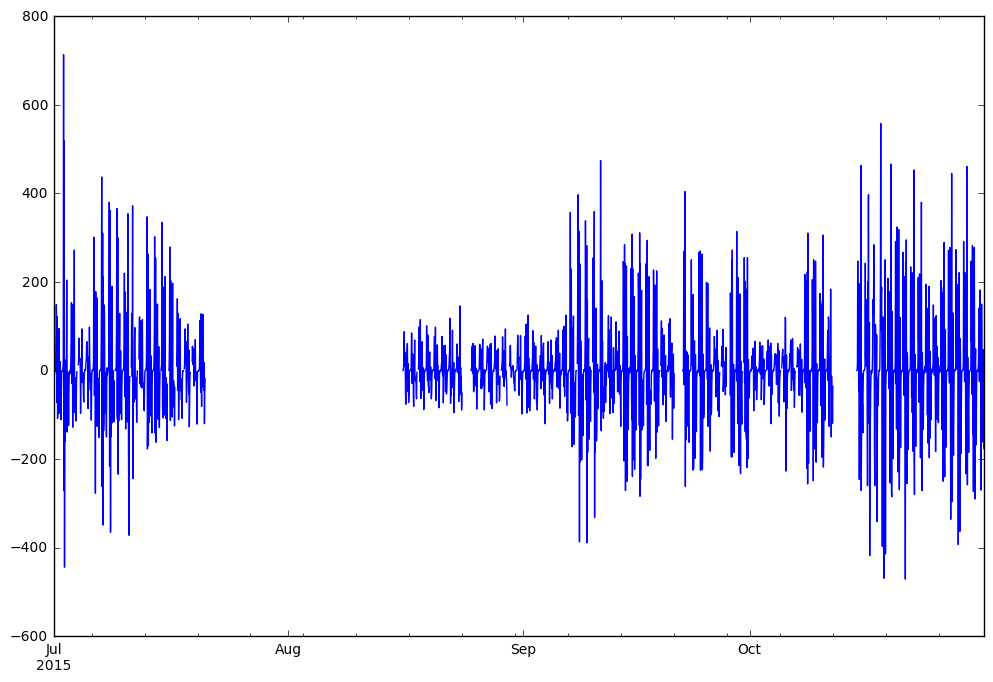

In [121]:
fig = plt.figure(figsize=(12,8))
ax1= fig.add_subplot(111)
diff1 = dt.diff(1)
diff1.plot(ax=ax1)
plt.show()

In [399]:
diff1[1]

-2.0

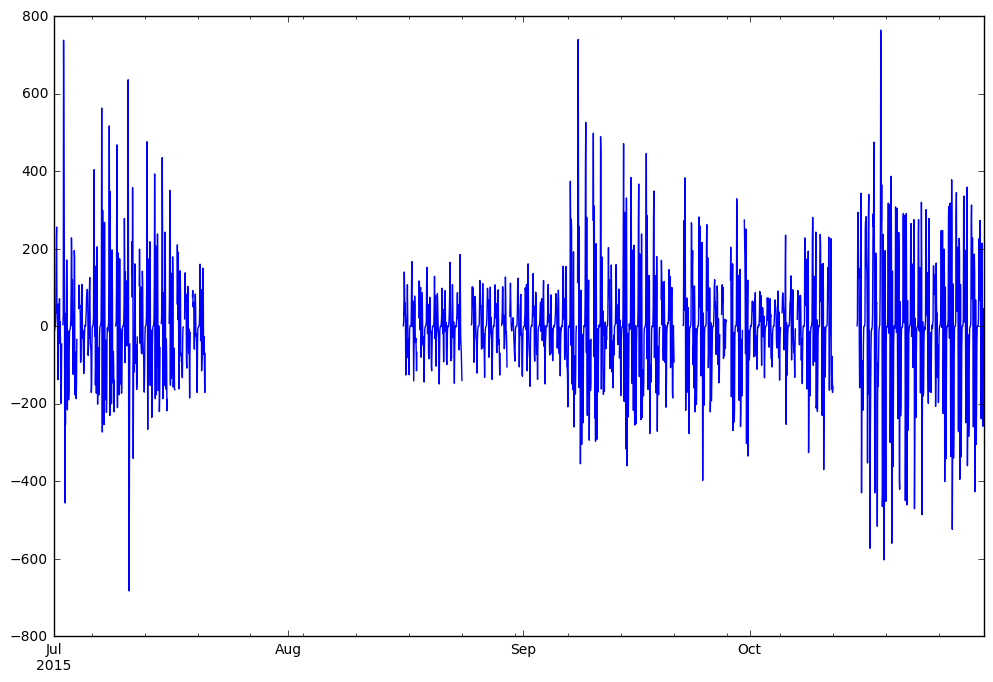

In [122]:
fig = plt.figure(figsize=(12,8))
ax2= fig.add_subplot(111)
diff2 = dt.diff(2)
diff2.plot(ax=ax2)
plt.show()

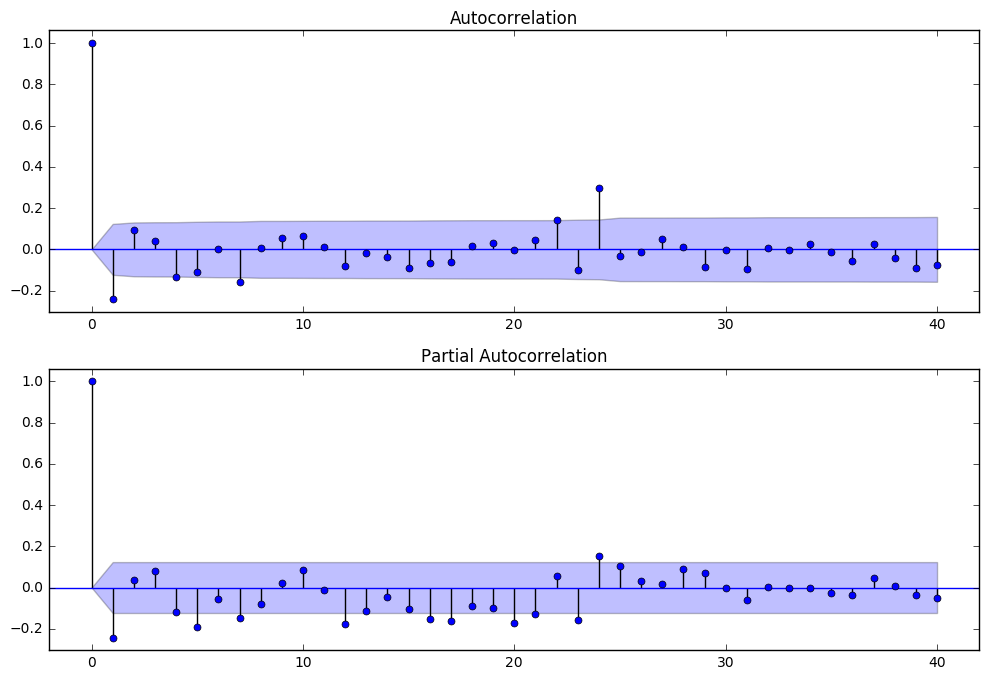

In [118]:
diff1 = dtprehalf.diff(1)
diff1.dropna(inplace=True)
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(diff1,lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(diff1,lags=40,ax=ax2)
plt.show()

In [184]:
for i in range(0,20):
    for j in range(0,20):
        try:
            arma_mod20 = sm.tsa.ARMA(diff1,(i,j)).fit()
            print(i,j,arma_mod20.aic,arma_mod20.bic,arma_mod20.hqic)
        except (np.linalg.LinAlgError, ValueError):
            pass

0 0 3059.64091032 3066.79280852 3062.5147605
0 1 3042.2242709966204 3052.95211831 3046.53504627
0 2 3036.6728723583965 3050.97666877 3042.42057272
0 3 3038.3595287046605 3056.23927422 3045.54415416
0 4 3034.970833109943 3056.42652773 3043.59238366
0 5 3032.8507265927283 3057.88237031 3042.90920223
0 6 3034.4262847918126 3063.03387762 3045.92168552
0 7 3006.370383053102 3038.55392498 3019.30270887
0 8 3007.829259393303 3043.58875042 3022.1985103
0 9 3009.2393576236173 3048.57479776 3025.04553363
0 10 3004.1656257437603 3047.07701498 3021.40872684
0 11 2993.2718351774415 3039.75917352 3011.95186136
0 12 2994.5382178207237 3044.60150526 3014.6551691
1 0 3035.971612102958 3046.69945941 3040.28238738
1 1 3028.6730124848414 3042.9768089 3034.42071285
1 2 3030.215076647407 3048.09482216 3037.3997021
1 3 3032.2109242823212 3053.6666189 3040.83247483
1 4 3029.679334999951 3054.71097872 3039.73781064
1 6 3012.1201389009875 3044.30368083 3025.05246472
2 0 3033.2216435103715 3047.52543992 3038.969

E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 2 2970.6760243298886 3002.85956626 2983.60835015


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


5 3 2972.625100449747 3008.38459148 2986.99435136
6 0 3032.822157446448 3061.42975027 3044.31755818
6 1 3000.976368943101 3033.15991087 3013.90869476
6 2 2987.6931231833123 3023.45261421 3002.06237409
6 3 2986.6558546436377 3025.99129478 3002.46203065
7 0 3034.1774988054212 3066.36104073 3047.10982463
7 1 2994.4319733309053 3030.19146436 3008.80122424


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


7 2 2966.3391770023354 3005.67461714 2982.145353
8 0 3030.6719498924226 3066.43144092 3045.0412008
8 1 2991.8264523761345 3031.16189251 3007.63262838
8 2 2986.337716184584 3029.24910542 3003.58081728
9 0 3032.4374230377975 3071.77286317 3048.24359904


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


9 1 2993.434251019035 3036.34564026 3010.67735211
10 0 3034.430168789511 3077.34155803 3051.67326988
10 1 2988.9223229630147 3035.4096613 3007.60234915


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10 2 2957.4568915174914 3007.52017896 2977.57384279
11 0 3034.3740897143543 3080.86142806 3053.0541159
11 1 2971.0831659460673 3021.14645339 2991.20011722


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


11 2 2956.552835317402 3010.19207186 2978.10671168
12 0 3000.6689897468286 3050.73227719 3020.78594102
12 1 2950.6422878160492 3004.28152436 2972.19616418
12 2 2952.6422463154804 3009.85743197 2975.63304777


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


12 3 2949.0920599978726 3009.88319475 2973.51978655
13 0 2974.0352964607755 3027.67453301 2995.58917283
13 1 2952.6422162632816 3009.85740191 2975.63301772


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13 2 2946.1984467073344 3006.98958146 2970.62617326


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


13 3 2940.7082877031953 3005.07537156 2966.57293934
14 0 2971.7444571403557 3028.95964279 2994.7352586
14 1 2952.051921117784 3012.84305587 2976.47964767
14 2 2946.329423468334 3010.69650732 2972.19407511


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


14 3 2937.3845576083354 3005.32759057 2964.68613434
15 0 2973.2899629216217 3034.08109768 2997.71768947
15 1 2953.689829897669 3018.05691375 2979.55448154
15 2 2948.2780069315927 3016.22103989 2975.57958366


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


15 3 2940.755376697349 3012.27435876 2969.49387852
16 0 2974.5510962372937 3038.91818009 3000.41574788
16 1 2950.8492094822745 3018.79224244 2978.15078621


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


16 2 2934.4921246715658 3006.01110673 2963.23062649


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


16 3 2942.4689510123653 3017.56388218 2972.64437793


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


16 5 2953.962223668956 3036.20905304 2987.01150077
17 0 2960.958039294061 3028.90107225 2988.25961603
17 1 2944.310194397259 3015.82917646 2973.04869622


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


17 2 2933.2349745253728 3008.32990569 2963.41040144


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


17 3 2915.0830502543777 2993.75393052 2946.69540226


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


17 4 2922.3542507433813 3004.60108012 2955.40352784


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


17 5 2928.9740313367633 3014.79680981 2963.46023352
18 0 2962.837734412286 3034.35671648 2991.57623624
18 1 2946.2519730628865 3021.34690423 2976.42739998


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18 2 2935.180879891519 3013.85176016 2966.7932319


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18 3 2916.1914567148674 2998.43828609 2949.24073381


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18 4 2915.4350724860565 3001.25785096 2949.92127467


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


18 5 2904.8045914792538 2994.20331906 2940.72771876
19 0 2939.891920468713 3014.98685163 2970.06734738


E:\陈廷硕\Anaconda3-4.2.0\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


19 1 2924.6367561731945 3003.30763644 2956.24910818


In [119]:
diff2 = dtprehalf.diff(2)
diff2.dropna(inplace=True)
arma_mod20 = sm.tsa.ARMA(diff2,(5,0)).fit()
resid = arma_mod20.resid
r,q,p = sm.tsa.acf(resid.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
predict_sunspots = arma_mod20.predict('2015-10-12 01:00:00', '2015-10-15 02:00:00', dynamic=True)

ValueError: There is no frequency for these dates and date 2015-10-12 01:00:00 is not in dates index. Try giving a date that is in the dates index or use an integer

In [50]:
for i in range(0, len(predict_sunspots)):
    if i == 0:
        predict_sunspots[i] += dtprehalf[264]
    else:
        predict_sunspots[i] += predict_sunspots[i - 1]
predict_sunspots

2015-10-12 01:00:00    -12.722212
2015-10-12 02:00:00     28.133226
2015-10-12 03:00:00     33.134009
2015-10-12 04:00:00     47.033446
2015-10-12 05:00:00      7.458714
2015-10-12 06:00:00    -68.214536
2015-10-12 07:00:00     13.010578
2015-10-12 08:00:00    179.899032
2015-10-12 09:00:00    274.776612
2015-10-12 10:00:00    313.309989
2015-10-12 11:00:00    409.549970
2015-10-12 12:00:00    481.494468
2015-10-12 13:00:00    467.715667
2015-10-12 14:00:00    472.166575
2015-10-12 15:00:00    495.875670
2015-10-12 16:00:00    535.949455
2015-10-12 17:00:00    592.315099
2015-10-12 18:00:00    636.376335
2015-10-12 19:00:00    600.241009
2015-10-12 20:00:00    484.871601
2015-10-12 21:00:00    373.268013
2015-10-12 22:00:00    297.280734
2015-10-12 23:00:00    206.962544
2015-10-13 00:00:00    136.564143
2015-10-13 01:00:00    122.232857
2015-10-13 02:00:00    112.191197
2015-10-13 03:00:00     82.804059
2015-10-13 04:00:00     50.340144
2015-10-13 05:00:00     39.745670
2015-10-13 06:

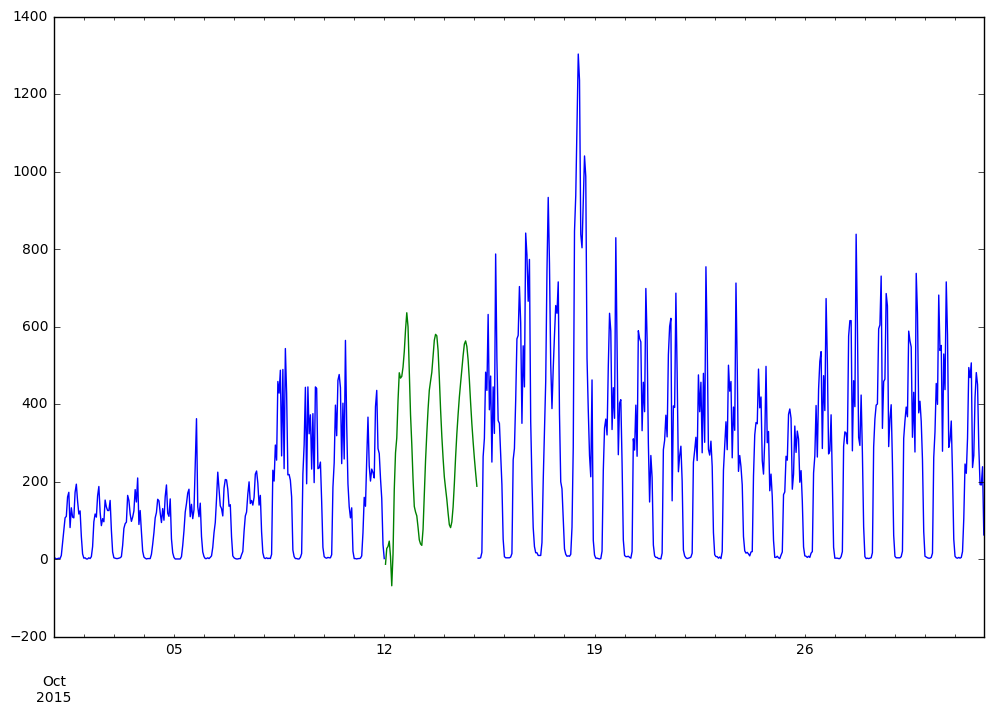

In [51]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = dt.ix['2015-10-01 00:00:00':].plot(ax=ax)
predict_sunspots.plot(ax=ax)
plt.show()

In [154]:
result = pd.read_csv('result.csv')
result.head()

,loc-id,time-stamp,numOfPeople
0,1,110100,104
1,1,110101,24
2,1,110102,21
3,1,110103,19
4,1,110104,24


In [157]:
result_div = result / 6
result_div.head()

,loc-id,time-stamp,numOfPeople
0,0.166667,18350.000000,17.333333
1,0.166667,18350.166667,4.000000
2,0.166667,18350.333333,3.500000
3,0.166667,18350.500000,3.166667
4,0.166667,18350.666667,4.000000


In [158]:
result_div.to_csv('result6.csv', columns = ['loc-id', 'time-stamp', 'numOfPeople'], header = False, index = False)

In [128]:
def move_mean(startDate,endDate,dalta):
    ### 加权移动平均
    ###startDate  ：从什么时间开始预测
    ###endDate ：结束的天
    ###dalta 临近日期的权重
    nums_Nov={}
    tmp_dict={}
    date=pd.datetime.strptime(startDate,'%Y%m%d%H')#'2015101500'
    end=pd.datetime.strptime(endDate,'%Y%m%d%H')#'2015101500'
    EvaluationDaysNum=(end-date).days+2
    for day in range(1,EvaluationDaysNum):
        reader=pd.read_csv('./data/'+str(date.weekday()+1)+'.csv',names=['nums','locID','time'])
        reader=pd.concat([reader,pd.DataFrame(tmp_dict).T],axis=0)
        tmp_dict={}
        reader=reader[reader['time'].apply(lambda x:pd.to_datetime(x)<pd.to_datetime(startDate,format='%Y%m%d%H'))]
        for hour in range(24):
#             reader=pd.concat([reader,pd.DataFrame(nums_Nov).T],axis=0)
            hours=reader[reader['time'].apply(lambda x:pd.to_datetime(x).hour==date.hour)]
            
            leng=len(hours)
            loc=hours.groupby('locID',as_index=False)
            for name,lo in loc:
                above_eight=lo[lo['time'].apply(lambda x:pd.to_datetime(x).month>8)]
                nums=0
                nums+=dalta*above_eight['nums'].sum()
                
                belong_eight=lo[lo['time'].apply(lambda x:pd.to_datetime(x).month<9)]
                nums+=(1-dalta)*belong_eight['nums'].sum()
                nums=nums/(len(above_eight)*dalta+(len(belong_eight))*(1-dalta))
                nums_Nov[(date,name)]=[nums,date,name]
                tmp_dict[(date,name)]=[nums,date,name]
                
            date=date+datetime.timedelta(hours = 1)
#         break
    df=pd.DataFrame(nums_Nov).T
    df.columns=['nums','time','locID']
    df['nums']=df['nums'].astype(int)
    df.index=[i for i in range(len(df))]
    df['time']=df['time'].apply(lambda x:x.strftime('%Y%m%d%H')[4:])
    df.sort_values(['locID','time'],inplace=True)
    return df